In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import gzip
sns.set()
plt.rcParams['figure.dpi'] = 144

# Download files

In [13]:
!mkdir dw-data
!wget https://github.com/bahategar/WQU-Applied-DS1-dw-project-based/raw/main/201606scripts_sample.csv.gz -nc -P ./dw-data/
!wget https://github.com/bahategar/WQU-Applied-DS1-dw-project-based/raw/main/201701scripts_sample.csv.gz -nc -P ./dw-data/
!wget https://github.com/bahategar/WQU-Applied-DS1-dw-project-based/raw/main/chem.csv.gz -nc -P ./dw-data/
!wget https://github.com/bahategar/WQU-Applied-DS1-dw-project-based/raw/main/practices.csv.gz -nc -P ./dw-data/

--2022-08-05 13:27:41--  https://github.com/bahategar/WQU-Applied-DS1-dw-project-based/raw/main/201606scripts_sample.csv.gz
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bahategar/WQU-Applied-DS1-dw-project-based/main/201606scripts_sample.csv.gz [following]
--2022-08-05 13:27:41--  https://raw.githubusercontent.com/bahategar/WQU-Applied-DS1-dw-project-based/main/201606scripts_sample.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18768259 (18M) [application/octet-stream]
Saving to: ‘./dw-data/201606scripts_sample.csv.gz’

201606scripts_sampl 100%[===================>]  17.90M   116MB/s 

# Loading the data

In [14]:
# load the 2016 data
data_2016 = gzip.open('/content/dw-data/201606scripts_sample.csv.gz', 'r')
df_2016 = pd.read_csv(data_2016)
df_2016.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85638,0301011R0,Salamol_Inha 100mcg (200 D) CFF (Teva),2,2.92,2.73,2
1,N85638,0301011R0,Easyhaler_Salbutamol Sulf 200mcg (200D),1,6.63,6.15,1
2,N85638,0301020I0,Ipratrop Brom_Inh Soln 500mcg/2ml Ud,1,1.77,1.75,12
3,N85638,0301020I0,Ipratrop Brom_Inh Soln 250mcg/1ml Ud,1,4.47,4.15,20
4,N85638,0302000C0,Clenil Modulite_Inha 50mcg (200D),1,3.70,3.44,1


In [15]:
# load the 2017 data

data_2017 = gzip.open('/content/dw-data/201701scripts_sample.csv.gz', 'r')
df_2017 = pd.read_csv(data_2017)
df_2017.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [16]:
# load chem data

data_chem = gzip.open('/content/dw-data/chem.csv.gz', 'r')
df_chem = pd.read_csv(data_chem)
df_chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [17]:
# rename columns DataFrame

df_chem.columns = ['chem_sub', 'name']
df_chem.head()

,chem_sub,name
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [18]:
# load practices data

data_pr = gzip.open('/content/dw-data/practices.csv.gz', 'r')
df_pr = pd.read_csv(data_pr, header=None)
df_pr.head()

,0,1,2,3,4,5,6
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [19]:
# Change column names

col_pr = [ 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village', 'post_code']
df_pr.columns = col_pr
df_pr.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


# Explarotary data

In [20]:
# Summary statistics of data 2016

df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973193 entries, 0 to 973192
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   practice  973193 non-null  object 
 1   bnf_code  973193 non-null  object 
 2   bnf_name  973193 non-null  object 
 3   items     973193 non-null  int64  
 4   nic       973193 non-null  float64
 5   act_cost  973193 non-null  float64
 6   quantity  973193 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 52.0+ MB


In [21]:
# Missing value identification

df_2016.isnull().sum()

practice    0
bnf_code    0
bnf_name    0
items       0
nic         0
act_cost    0
quantity    0
dtype: int64

In [22]:
df_sum2016 = df_2016[['items', 'nic', 'act_cost', 'quantity']].agg(['sum'])

df_sum2016

,items,nic,act_cost,quantity
sum,8866707,73553383.1,68421205.04,735738235


In [23]:
summary_2016 = pd.concat([df_sum2016, df_2016.describe().drop(['count', 'min', 'max'])])

summary_2016

,items,nic,act_cost,quantity
sum,8.866707e+06,7.355338e+07,6.842121e+07,7.357382e+08
mean,9.110944e+00,7.557944e+01,7.030590e+01,7.560044e+02
std,3.016797e+01,2.089771e+02,1.937841e+02,4.122452e+03
25%,1.000000e+00,8.080000e+00,7.580000e+00,2.800000e+01
50%,2.000000e+00,2.320000e+01,2.171000e+01,1.000000e+02
75%,6.000000e+00,6.652000e+01,6.196000e+01,3.580000e+02


In [24]:
# Summary statistics of data 2017

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973193 entries, 0 to 973192
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   practice  973193 non-null  object 
 1   bnf_code  973193 non-null  object 
 2   bnf_name  973193 non-null  object 
 3   items     973193 non-null  int64  
 4   nic       973193 non-null  float64
 5   act_cost  973193 non-null  float64
 6   quantity  973193 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 52.0+ MB


In [25]:
# Missing value identification

df_2017.isnull().sum()

practice    0
bnf_code    0
bnf_name    0
items       0
nic         0
act_cost    0
quantity    0
dtype: int64

In [26]:
df_sum2017 = df_2017[['items', 'nic', 'act_cost', 'quantity']].agg(['sum'])

df_sum2017

,items,nic,act_cost,quantity
sum,8888304,71100424.84,66164096.12,721457006


In [27]:
summary_2017 = pd.concat([df_sum2017, df_2017.describe().drop(['count', 'min', 'max'])])

summary_2017

,items,nic,act_cost,quantity
sum,8.888304e+06,7.110042e+07,6.616410e+07,7.214570e+08
mean,9.133136e+00,7.305892e+01,6.798661e+01,7.413298e+02
std,2.920420e+01,1.880703e+02,1.744017e+02,3.665427e+03
25%,1.000000e+00,7.800000e+00,7.330000e+00,2.800000e+01
50%,2.000000e+00,2.264000e+01,2.122000e+01,1.000000e+02
75%,6.000000e+00,6.500000e+01,6.067000e+01,3.500000e+02


# Products with high growth rate

In [28]:
drugs_16 = df_2016[['bnf_name','items']]
drugs_16 = drugs_16.groupby('bnf_name').count().reset_index()
drugs_16.columns = ['bnf_name', 'count16']
drugs_16.head()

,bnf_name,count16
0,365 Film 15cm x 20cm VP Adh Film Dress,1
1,365 Film 4cm x 5cm VP Adh Film Dress,1
2,365 Non Adherent 10cm x 10cm Pfa Plas Fa,3
3,365 Non Woven Island 10cm x 10cm Adh Dre,1
4,365 Non Woven Island 10cm x 15cm Adh Dre,1


In [29]:
drugs_17 = df_2017[['bnf_name','items']]
drugs_17 = drugs_17.groupby('bnf_name').count().reset_index()
drugs_17.columns = ['bnf_name', 'count17']
drugs_17.head()

,bnf_name,count17
0,365 Film 10cm x 12cm VP Adh Film Dress,1
1,365 Non Adherent 10cm x 10cm Pfa Plas Fa,3
2,365 Non Adherent 10cm x 20cm Pfa Plas Fa,1
3,365 Non Woven Island 8cm x 10cm Adh Dres,1
4,365 Transpt Island 5cm x 7.2cm VP Adh Fi,2


In [30]:
drugs = drugs_16.merge(drugs_17, on='bnf_name', how='inner')
drugs = drugs[drugs['count16']>=50]
drugs.head()

,bnf_name,count16,count17
2,3m Health Care_Cavilon Durable Barrier C,825,816
3,3m Health Care_Cavilon No Sting 1ml Barr,231,223
4,3m Health Care_Cavilon No Sting 3ml Barr,105,94
5,3m Health Care_Cavilon No Sting Barrier,454,412
8,A.S Saliva Orthana Spy 50ml (App),84,121


In [31]:
drugs['growth'] = ((drugs['count17']-drugs['count16'])/drugs['count16'])
drugs = drugs[['bnf_name', 'growth', 'count16']]
drugs.sort_values('growth', ascending=False, inplace=True)
drugs_final = pd.concat([drugs.iloc[:50], drugs.iloc[-50:]], axis=0)

In [32]:
drugs_final.head(10)

,bnf_name,growth,count16
1467,Butec_Transdermal Patch 5mcg/hr,3.467742,62
1465,Butec_Transdermal Patch 10mcg/hr,3.000000,69
4415,Fostair NEXThaler_Inh 200mcg/6mcg (120D),1.430233,86
8498,Pneumococcal_Vac 0.5ml Vl (23 Valent),1.269430,193
9993,Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,1.269231,52
10699,Trulicity_Inj 1.5mg/0.5ml Pf Pen,1.185185,54
2865,CosmoCol_Paed Oral Pdr Sach 6.9g,1.177419,62
3634,Dulaglutide_Inj 1.5mg/0.5ml Pf Dev,0.963415,82
11112,ViATIM_Vac D/Chamber 160u/25mcg 1ml Pfs,0.912000,125
3819,Empagliflozin_Tab 25mg,0.896000,125


In [33]:
drugs_anomalies = drugs_final[drugs_final.growth > 1.0]
drugs_anomalies = drugs_anomalies.merge(drugs_17, on='bnf_name', how='inner').sort_values('growth').tail(10)

In [34]:
drugs_anomalies

,bnf_name,growth,count16,count17
6,CosmoCol_Paed Oral Pdr Sach 6.9g,1.177419,62,135
5,Trulicity_Inj 1.5mg/0.5ml Pf Pen,1.185185,54,118
4,Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,1.269231,52,118
3,Pneumococcal_Vac 0.5ml Vl (23 Valent),1.269430,193,438
2,Fostair NEXThaler_Inh 200mcg/6mcg (120D),1.430233,86,209
1,Butec_Transdermal Patch 10mcg/hr,3.000000,69,276
0,Butec_Transdermal Patch 5mcg/hr,3.467742,62,277


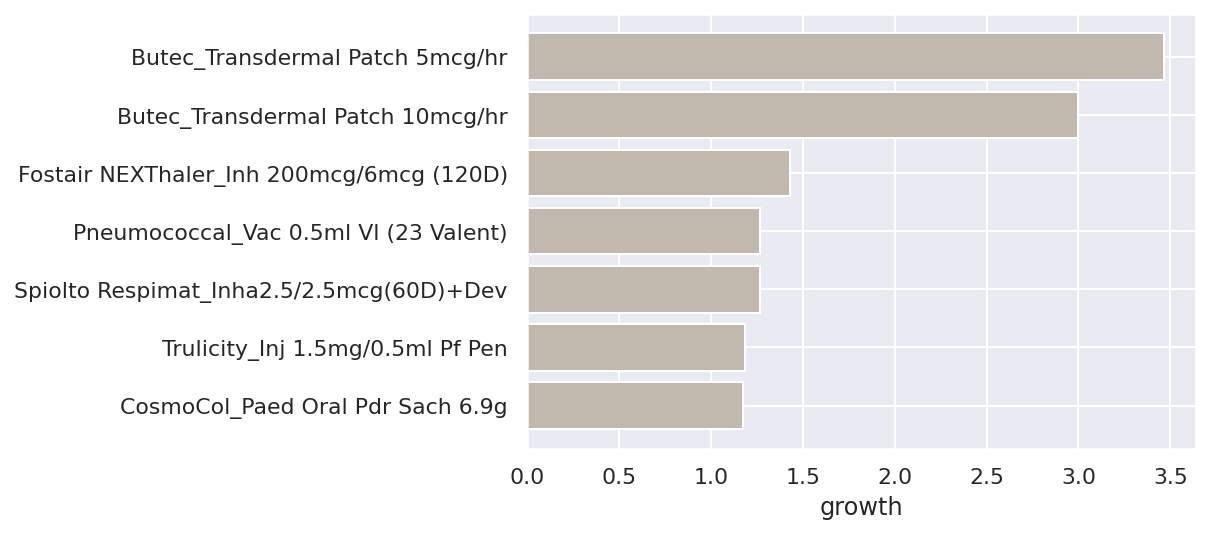

In [35]:
fig, ax = plt.subplots()
ax.barh(drugs_anomalies.bnf_name, drugs_anomalies.growth, color='#c1b9ae')
plt.xlabel('growth')
plt.show()

In [36]:
df_common = df_2017.groupby('bnf_name').sum()['items'].sort_values(ascending=False).head(10)

In [37]:
print(df_common.values)

[218583 151669 148591 132941 128245 125985 119757 111133 109818  85940]


# Find practices that prescribe an unusually high amount of opioids

Steps :

1. Identifying practitioners that enable drug abuse by looking for practices where commonly abused drugs are prescribed unusually often.

2. Do z-testing each average opioid respectively averave all opioid items

In [38]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine'] 


# creating test if the name of drugs contain opioids
df_chem [ 'test' ] = df_chem [ 'name' ].apply ( lambda x: any ( [ k in x.lower() for k in opioids ] ) ) 

# the code that contain opioids
chem_code_opioids = list(df_chem[df_chem.test == True]['chem_sub'])

In [39]:
print(chem_code_opioids)

['0104020D0', '0104020N0', '0309010C0', '0309010N0', '0309010S0', '0309020AC', '0407010F0', '0407010M0', '0407010N0', '0407010R0', '0407010T0', '0407010V0', '0407020AD', '0407020AE', '0407020AF', '0407020A0', '0407020B0', '0407020C0', '0407020E0', '0407020G0', '0407020K0', '0407020M0', '0407020N0', '0407020P0', '0407020Q0', '0407020V0', '0407020Z0', '040702010', '040702020', '0409010A0', '0410030A0', '0410030C0', '0704050G0', '1501043F0', '1502010Z0']


In [40]:
# Merging the data
df_2017 = df_2017.merge(df_pr, left_on = 'practice', right_on = 'code')
df_2017['opioids'] = df_2017['bnf_code'].apply(lambda x: 1 if x in chem_code_opioids else 0)
df_2017['cnt'] = 0 # Creating count column
df_2017.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,code,name,addr_1,addr_2,borough,village,post_code,opioids,cnt
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,N85639,GP OOH VCH,VICTORIA CENTRAL HOSPITAL,MILL LANE,WALLASEY,NaN,CH44 5UF,0,0
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,N85639,GP OOH VCH,VICTORIA CENTRAL HOSPITAL,MILL LANE,WALLASEY,NaN,CH44 5UF,0,0
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,N85639,GP OOH VCH,VICTORIA CENTRAL HOSPITAL,MILL LANE,WALLASEY,NaN,CH44 5UF,0,0
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,N85639,GP OOH VCH,VICTORIA CENTRAL HOSPITAL,MILL LANE,WALLASEY,NaN,CH44 5UF,0,0
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,N85639,GP OOH VCH,VICTORIA CENTRAL HOSPITAL,MILL LANE,WALLASEY,NaN,CH44 5UF,0,0


In [41]:
df_2017.sort_values('opioids', ascending=False)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,code,name,addr_1,addr_2,borough,village,post_code,opioids,cnt
373649,N84025,0407020AD,OxyNorm_Cap 10mg,3,114.30,105.86,280,N84025,WESTWAY MEDICAL CENTRE,WESTWAY MEDICAL CENTRE,WESTWAY MAGHULL,LIVERPOOL,NaN,L31 0DJ,1,0
473449,B82027,0407020AD,OxyNorm_Oral Soln 5mg/5ml S/F,6,67.97,62.99,1750,B82027,THE SPA SURGERY,MOWBRAY SQUARE MED CTR,MYRTLE SQUARE,HARROGATE,NORTH YORKSHIRE,HG1 5AR,1,0
473451,B82027,0407020AD,Longtec_Tab 5mg M/R,5,62.60,58.02,280,B82027,THE SPA SURGERY,MOWBRAY SQUARE MED CTR,MYRTLE SQUARE,HARROGATE,NORTH YORKSHIRE,HG1 5AR,1,0
473452,B82027,0407020AD,Longtec_Tab 10mg M/R,6,82.72,77.05,370,B82027,THE SPA SURGERY,MOWBRAY SQUARE MED CTR,MYRTLE SQUARE,HARROGATE,NORTH YORKSHIRE,HG1 5AR,1,0
473453,B82027,0407020AD,Longtec_Tab 20mg M/R,6,150.24,139.16,336,B82027,THE SPA SURGERY,MOWBRAY SQUARE MED CTR,MYRTLE SQUARE,HARROGATE,NORTH YORKSHIRE,HG1 5AR,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385715,N83022,1310050H0,Crystacide_Crm 1%,1,11.62,10.77,40,N83022,LIME GROVE SURGERY,LIME GROVE SURGERY,STATION ROAD HAYDOCK,ST.HELENS,MERSEYSIDE,WA11 0JN,0,0
385716,N83022,1310050H0,Crystacide_Crm 1%,1,11.62,10.77,40,N83022,LIME GROVE SURGERY,LIME GROVE SURGERY,WOODSIDE H/C WOODSIDE RD,HAYDOCK,NaN,WA11 0NA,0,0
385717,N83022,1311020L0,Hibiscrub_Soln,1,5.25,4.87,500,N83022,LIME GROVE SURGERY,LIME GROVE SURGERY,STATION ROAD HAYDOCK,ST.HELENS,MERSEYSIDE,WA11 0JN,0,0
385718,N83022,1311020L0,Hibiscrub_Soln,1,5.25,4.87,500,N83022,LIME GROVE SURGERY,LIME GROVE SURGERY,WOODSIDE H/C WOODSIDE RD,HAYDOCK,NaN,WA11 0NA,0,0


In [42]:
df_2017.columns

Index(['practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost',
       'quantity', 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village',
       'post_code', 'opioids', 'cnt'],
      dtype='object')

In [43]:
opioids_per_practice = df_2017.groupby ( [ 'practice', 'name' ], as_index = False ).agg ( { 'opioids': 'mean', 'cnt': 'count' } )
opioids_per_practice.drop_duplicates()
opioids_per_practice.head()

,practice,name,opioids,cnt
0,A81005,SPRINGWOOD SURGERY,0.033179,1507
1,A81007,BANKHOUSE SURGERY,0.043329,1454
2,A81011,CHADWICK PRACTICE,0.046556,1568
3,A81012,WESTBOURNE MEDICAL CENTRE,0.042793,1332
4,A81017,WOODBRIDGE PRACTICE,0.038140,2150


In [44]:
std_devn = df_2017.opioids.std ()
overall_rate = df_2017.opioids.mean()

opioids_per_practice['opioids'] = opioids_per_practice ['opioids'] - overall_rate

opioids_per_practice['std_err'] = std_devn / opioids_per_practice['cnt'] ** 0.5
opioids_per_practice['z_score'] = opioids_per_practice['opioids'] / opioids_per_practice['std_err']

In [45]:
print(overall_rate)
print(std_devn)

0.035797347828884114
0.18578462836316456


In [46]:
opioids_per_practice.head().sort_values(by='opioids', ascending=False)

,practice,name,opioids,cnt,std_err,z_score
2,A81011,CHADWICK PRACTICE,0.010759,1568,0.004692,2.293116
1,A81007,BANKHOUSE SURGERY,0.007531,1454,0.004872,1.545782
3,A81012,WESTBOURNE MEDICAL CENTRE,0.006995,1332,0.005090,1.374224
4,A81017,WOODBRIDGE PRACTICE,0.002342,2150,0.004007,0.584563
0,A81005,SPRINGWOOD SURGERY,-0.002619,1507,0.004786,-0.547214


In [47]:
opioids_per_practice[['name', 'z_score']].sort_values(by='z_score', ascending=False).head(10)

,name,z_score
780,NATIONAL ENHANCED SERVICE,11.696748
823,OUTREACH SERVICE NH / RH,7.339619
843,BRISDOC HEALTHCARE SERVICES OOH,6.151256
280,H&R P C SPECIAL SCHEME,5.123581
893,HMR BARDOC OOH,4.959750
873,INTEGRATED CARE 24 LTD (CWSX OOH),4.889836
582,DARWEN HEALTHCARE,4.840788
681,THE LIMES MEDICAL PRACTICE,4.548233
766,IC24 LTD (BRIGHTON & HOVE OOH),4.335914
906,OLDHAM 7 DAY ACCESS HUB2 OOH,4.312317


In [48]:
opioids_per_practice['p_value'] = st.norm.cdf(opioids_per_practice.z_score)

opioids_per_practice.sort_values(by='z_score', ascending=False).head(10)

,practice,name,opioids,cnt,std_err,z_score,p_value
780,Y01852,NATIONAL ENHANCED SERVICE,0.821346,7,0.070220,11.696748,1.000000
823,Y03006,OUTREACH SERVICE NH / RH,0.964203,2,0.131370,7.339619,1.000000
843,Y03668,BRISDOC HEALTHCARE SERVICES OOH,0.147536,60,0.023985,6.151256,1.000000
280,G81703,H&R P C SPECIAL SCHEME,0.158647,36,0.030964,5.123581,1.000000
893,Y04997,HMR BARDOC OOH,0.051430,321,0.010369,4.959750,1.000000
873,Y04585,INTEGRATED CARE 24 LTD (CWSX OOH),0.044015,426,0.009001,4.889836,0.999999
582,P81051,DARWEN HEALTHCARE,0.020541,1917,0.004243,4.840788,0.999999
681,P87017,THE LIMES MEDICAL PRACTICE,0.023249,1321,0.005112,4.548233,0.999997
766,Y01086,IC24 LTD (BRIGHTON & HOVE OOH),0.042634,357,0.009833,4.335914,0.999993
906,Y05327,OLDHAM 7 DAY ACCESS HUB2 OOH,0.107060,56,0.024827,4.312317,0.999992


# Find practices whose costs disproportionately originate from rarely prescribed items

identify practices whose costs disproportionately originate from rarely prescribed items

1. find the probability  p  of a prescription having a particular 'bnf_code' if the 'bnf_code' was randomly chosen from the unique options in the beneficiary data. We will call a 'bnf_code' rare if it is prescribed at a rate less than  0.1p .

2. Do z-testing 'bnf_code' that categorically rare respectively cost all 'bnf_code'

In [49]:
rates = df_2017['bnf_code'].value_counts() / df_2017['bnf_name'].count()

rates.head()

p = 1. /df_2017['bnf_code'].nunique()

mask = rates < .1 * p

rare_codes = rates[mask].index

df_2017['rare'] = df_2017['bnf_code'].isin(rare_codes)

df_2017.head()

rare_cost_prop = (df_2017[df_2017['rare']].groupby('practice')['act_cost'].sum()/ df_2017.groupby('practice')['act_cost'].sum()).fillna(0)

rare_cost_prop.head()

cost_all = df_2017[df_2017['rare']]['act_cost'].sum() / df_2017['act_cost'].sum()

relative_rare_cost_prop = rare_cost_prop - cost_all

standard_errors = relative_rare_cost_prop.std()  

z_score = relative_rare_cost_prop / standard_errors

In [50]:
df_2017[df_2017['rare']]['rare'].sum()

13163

In [51]:
df_2017.groupby('practice')['act_cost'].sum()

practice
A81005    103840.82
A81007    113482.49
A81011    159507.03
A81012     83296.81
A81017    232656.17
            ...    
Y05570        86.76
Y05583      1610.16
Y05597        90.41
Y05660      8762.51
Y05670        36.95
Name: act_cost, Length: 856, dtype: float64

In [52]:
df_pr.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [53]:
z_score

practice
A81005   -0.060196
A81007   -0.125880
A81011   -0.190875
A81012    0.000678
A81017   -0.112042
            ...   
Y05570   -0.259410
Y05583   -0.259410
Y05597   -0.259410
Y05660   -0.254056
Y05670   -0.259410
Name: act_cost, Length: 856, dtype: float64

In [54]:
df_z = pd.DataFrame(z_score.sort_values(ascending = False))
df_z.reset_index(inplace=True)
df_z.columns = ['practice', 'z_score']
df_z.head()
fin = (df_pr.groupby(['code'])[['code', 'name']]).head()
result = df_z.merge(fin, how = 'left', left_on = 'practice',right_on = 'code').drop('code', axis = 1)
df = result.groupby('practice').first().sort_values('z_score', ascending = False).reset_index()[:100]
df.head(10)[['name', 'z_score']]

,name,z_score
0,CONSULTANT DIABETES TEAM,16.318637
1,DMC COMMUNITY DERMATOLOGY RBWF,15.181061
2,OUTPATIENTS JUBILEE HEALTH CENTRE,7.570888
3,DMC COMMUNITY DERMATOLOGY CLINIC,7.284663
4,DMC HEALTHCARE,6.865169
5,BARMSTON MEDICAL CENTRE,5.687834
6,BINGLEY DERMATOLOGY CLINIC,5.292732
7,BASSETLAW HOSPICE OF THE GOOD SHEPHERD,4.309292
8,OLDHAM DERMATOLOGY SERVICE,4.121768
9,VERNOVA HEALTHCARE CIC,3.183446


In [55]:
df

,practice,z_score,name
0,Y03472,16.318637,CONSULTANT DIABETES TEAM
1,Y05320,15.181061,DMC COMMUNITY DERMATOLOGY RBWF
2,Y04404,7.570888,OUTPATIENTS JUBILEE HEALTH CENTRE
3,Y03484,7.284663,DMC COMMUNITY DERMATOLOGY CLINIC
4,Y04424,6.865169,DMC HEALTHCARE
...,...,...,...
95,K83051,0.227927,WEAVERS MEDICAL
96,Y00278,0.225538,DARLASTON HEALTH CENTRE-KHAN
97,G85134,0.224006,THE LISTER PRIMARY CARE CENTRE
98,P88023,0.214372,HEALD GREEN HEALTH CENTRE 2


# Top Selling Product

In [56]:
df_common = df_2017.groupby('bnf_code').sum()['items'].sort_values(ascending=False).head(10)

Text(0.5, 0, 'code product')

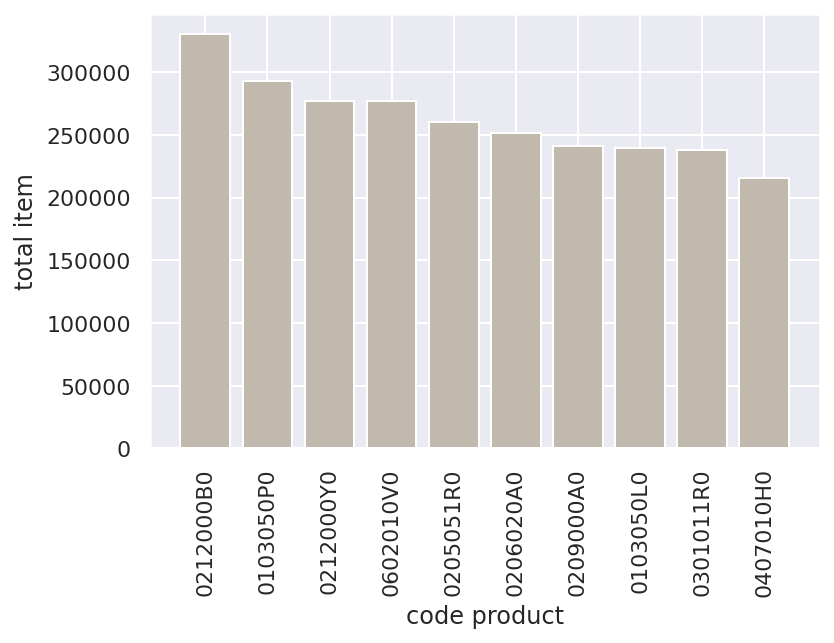

In [57]:
plt.bar(df_common.index, df_common.values,color='#c1b9ae')
plt.xticks(rotation=90)
plt.ylabel('total item')
plt.xlabel('code product')


In [58]:
df_common = df_2017.groupby('post_code').sum()['items'].sort_values(ascending=False).head(10)

Text(0.5, 0, 'postal code')

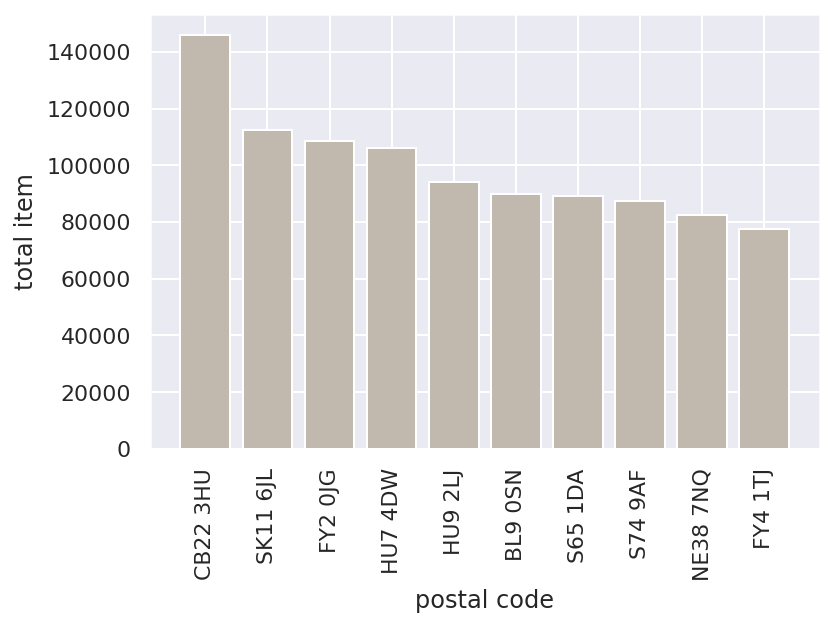

In [59]:
plt.bar(df_common.index, df_common.values, color='#c1b9ae')
plt.xticks(rotation=90)
plt.ylabel('total item')
plt.xlabel('postal code')

In [60]:
len(df_2017)

1134693